# Machine Learning 

Muhammad Ali Sabtain

Some helpful setup code. Feel free to add whatever else you might need.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from sklearn.datasets import fetch_california_housing, load_breast_cancer

# For reproducibility
np.random.seed(42)

## Part 1: Predicting House Prices

The `sklearn.datasets.fetch_california_housing` dataset contains information on houses in California. Let's train a model to predict house prices!

More info on the data can be found [here](http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html).

**1.1** Fetch the dataset and take a look at it (read the description, make a dataframe and run `describe()`, etc.). Notice that this version is already a little cleaned up compared to the version used in our textbook. 

**Briefly describe the differences between our version here and the on in the textbook.**

In [2]:
# 1.1 code here -- load and examine the data

dataset = fetch_california_housing()
print(dataset.DESCR)
X, y = dataset.data, dataset.target
features = dataset.feature_names
df = pd.DataFrame(X, columns=features)
display(df.describe())
display(df.info())
display(df.head())

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


None

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


**Answer 1.1 here**

| Book | `sklearn` | Notes |
| ---- | --------- | ----- |
| longitude | Longitude | same |
| latitude | Latitude | same |
| housing_median_age | HouseAge | same |
| total_rooms | AveRooms | Averaged over number of households |
| total_bedrooms | AveBedrms | Averaged over number of rooms |
| population | Population | same |
| households | - | not included |
| median_income | MedInc | same |
| median_house_value | - | this is our target |
| ocean_proximity | - | not included |

**1.2** Visualize the univariate distribution (as a histogram) of each feature, and the distribution of the target. Do you notice anything? Is something that you think might require special treatment (comment what it is, you’re not required to try to fix it).

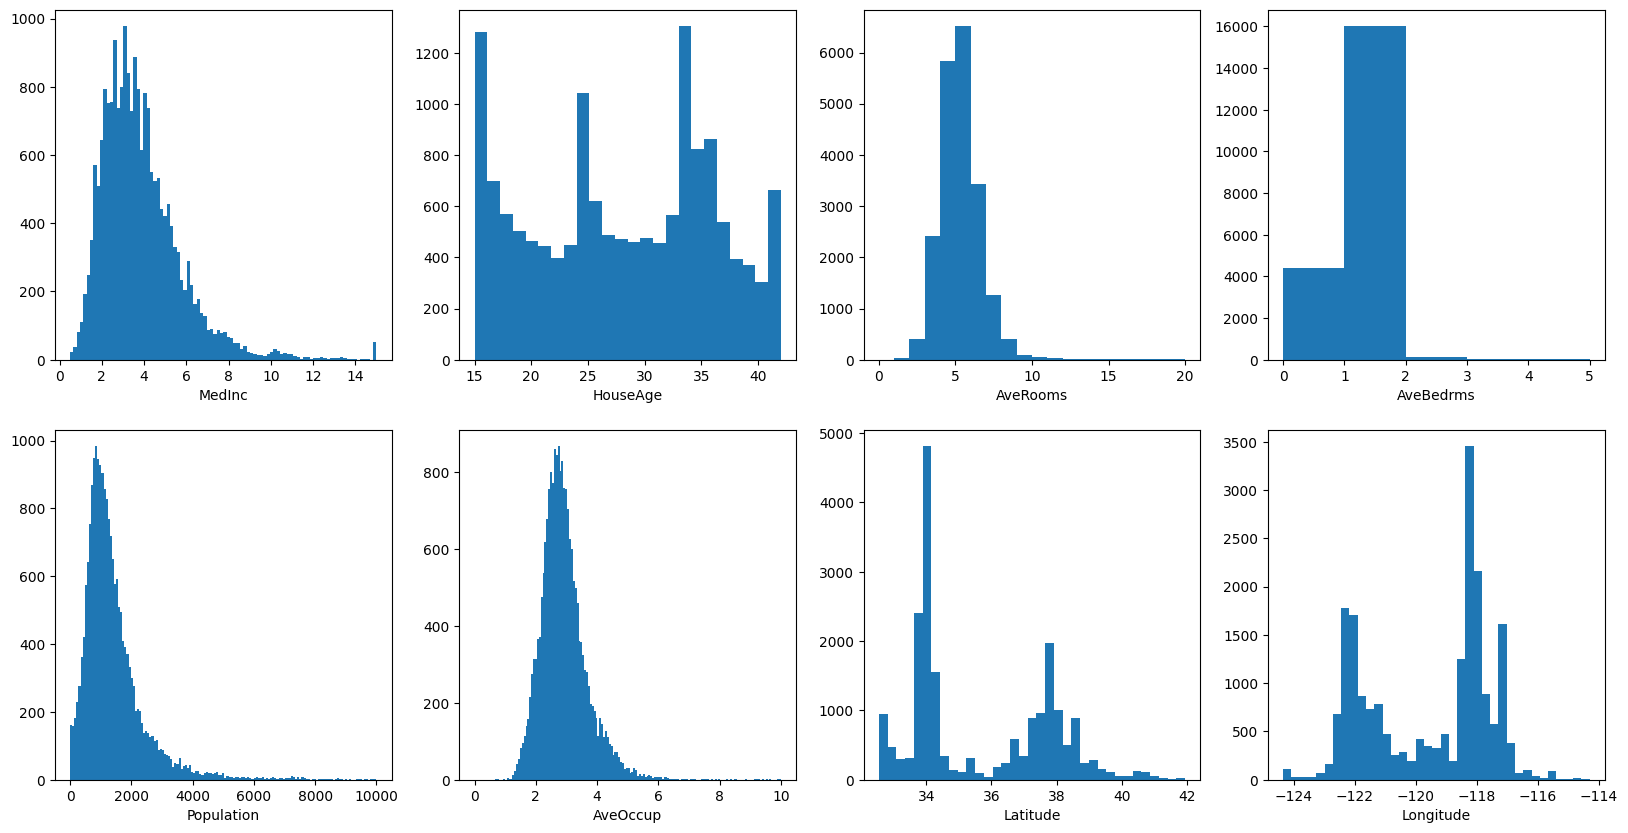

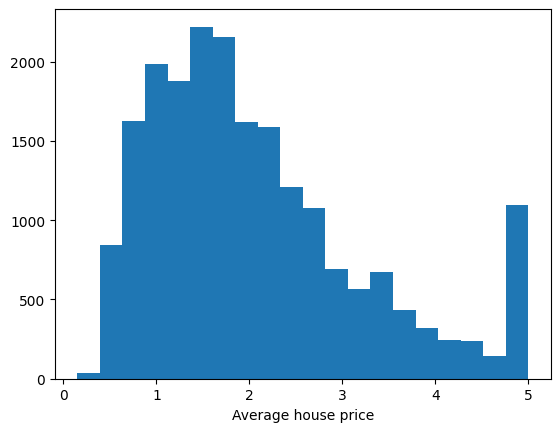

In [3]:
# 1.2 Code here

fig, axes = plt.subplots(2,4, figsize=(20,10))

bins = ['auto', 'auto', 20, 5] + (['auto']*4)
ranges = [None, [15,42], [0, 20], [0, 5], [0, 10000], [0, 10]] +  ([None]*3)
for i,ax in enumerate(axes.ravel()):
    ax.hist(X[:,i], bins=bins[i], range=ranges[i])
    ax.set_xlabel(features[i])
    
# Several of the features have ranges that are mostly very small except 
# for a few outliers. These cause the histograms to look like skinny little 
# spikes unless you change "bins" and "range".
# In fact, for AveOccup it looks like there's nothing there unless you set the
# range manually. So basically one thing is that we need to handle outliers...
# I did it by setting the range, but you could also remove the outliers 
# (or mask them out)

fig = plt.figure()
ax = plt.gca()
ax.hist(y, bins=20)
ax.set_xlabel("Average house price");

# The target seems to have a number of outliers at the end. This is indicative
# of some other population that is not well sampled. For example, maybe we have
# a few commercial neighborhoods in the data, which would be much more expensive
# than residential. Or, more likely for this dataset, the price was artificially
# 'capped'.

**1.3** Visualize the dependency of the target on each feature (2d scatter plot).

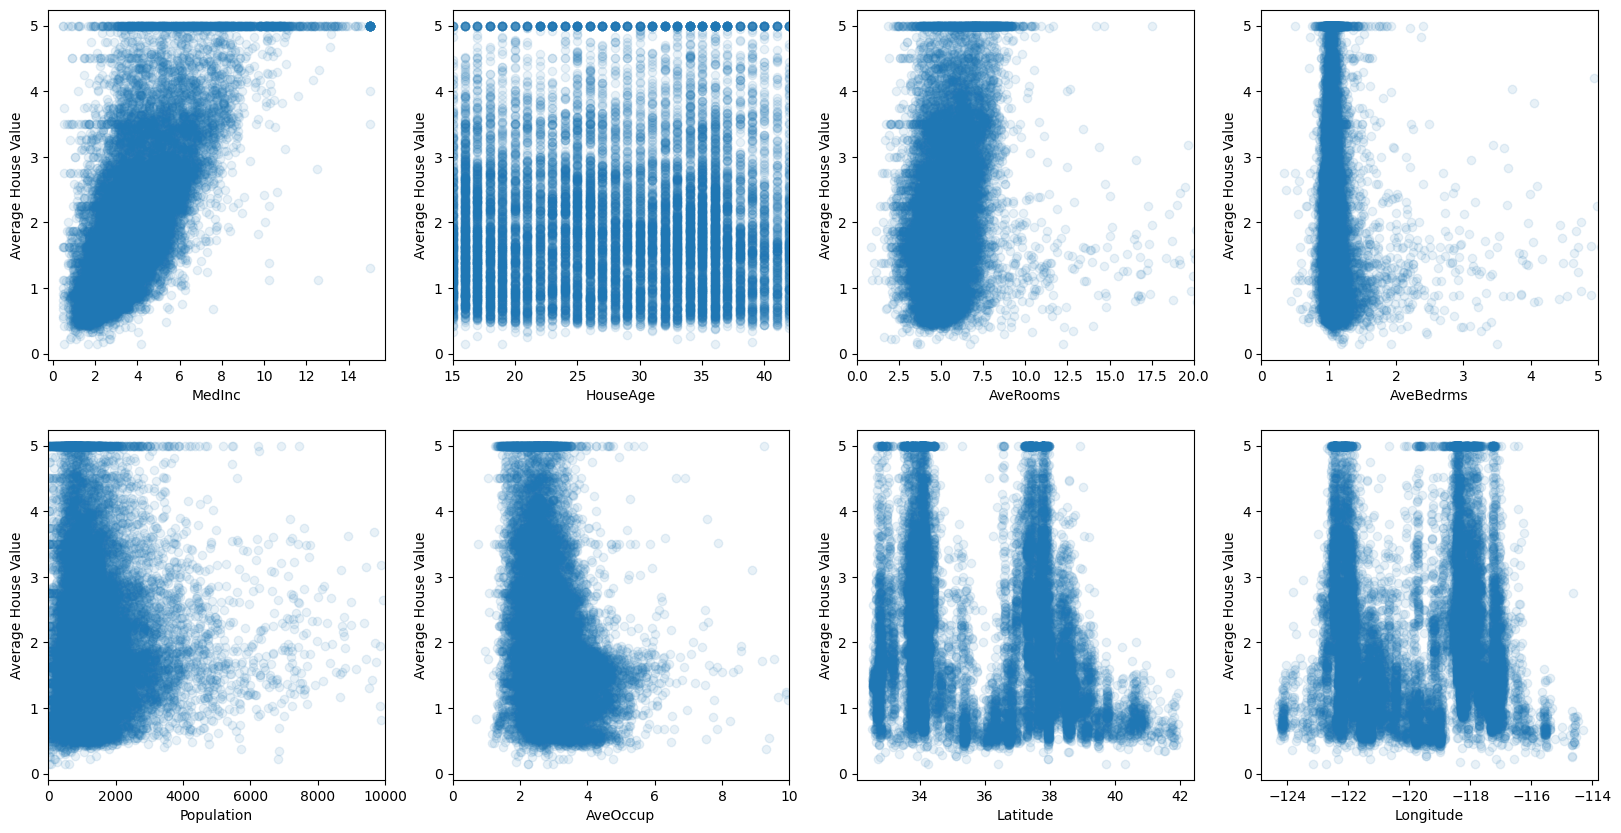

In [4]:
# 1.3 Code here

# I again used ranges to restrict the output, but you didn't have to.
# Or you could have plotted while removing outliers.
fig, axes = plt.subplots(2,4, figsize=(20,10))
ranges = [(None, None), (15,42), (0, 20), (0, 5), (0, 10000), (0, 10), (None, None), (None, None), (None, None)]
for i,ax in enumerate(axes.ravel()):
    ax.scatter(X[:,i], y, alpha=0.1)
    ax.set_xlim(*ranges[i])
    ax.set_xlabel(features[i])
    ax.set_ylabel('Average House Value')

**1.4** Split data into training and test set.

In [5]:
from sklearn.model_selection import train_test_split

# 1.4 Code here
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**1.5** Evaluate Linear Regression, Ridge, Lasso and ElasticNet using cross-validation with the default hyperparameters (use `cross_val_score`). Note that the "score" for these models is $R^2$, AKA the coefficient of determination. Do not preprocess the data in any way. Print out the results.

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

# 1.5 Code here

# Model 'families' (technically you could just use ElasticNet...)
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet()]
for model in models:
    score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    name = type(model).__name__
    print(f"{name} R2: {score:.3f}")


LinearRegression R2: 0.606
Ridge R2: 0.606
Lasso R2: 0.292
ElasticNet R2: 0.429


**1.6** Now do the same thing but scale the data first using `StandardScaler`. Does it help?

Be sure to avoid information leakage; I recommend a pipeline.

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline

# 1.6 Code here
for model in models:
    pipe = make_pipeline(StandardScaler(), model)
    score = np.mean(cross_val_score(pipe, X_train, y_train, cv=10))
    name = type(model).__name__
    print(f"{name} (StandardScaler): {score:.3f}")
    
# Just for fun let's try some other scalers...
for scaler in [MinMaxScaler(), RobustScaler()]:
    print('-'*20, f"{type(scaler).__name__}", '-'*20)
    for model in models:
        pipe = make_pipeline(scaler, model)
        score = np.mean(cross_val_score(pipe, X_train, y_train, cv=10))
        name = type(model).__name__
        print(f"{name} R2: {score:.3f}")

# Scaling actually hurts the performance of the models!

LinearRegression (StandardScaler): 0.606
Ridge (StandardScaler): 0.606
Lasso (StandardScaler): -0.001
ElasticNet (StandardScaler): 0.210
-------------------- MinMaxScaler --------------------
LinearRegression R2: 0.606
Ridge R2: 0.604
Lasso R2: -0.001
ElasticNet R2: -0.001
-------------------- RobustScaler --------------------
LinearRegression R2: 0.606
Ridge R2: 0.606
Lasso R2: -0.001
ElasticNet R2: 0.148


**1.7** Now let's tune the hyperparameters of the models using GridSearchCV. For right now don't worry too much about what the hyperparameters actually mean.

- `LinearRegression` does not have any hyperparameters...so you don't need any grid search at all.
- For `Ridge` and `Lasso`, try out some $\alpha$ (`alpha`) values, and **plot $\alpha$ (x-axis) against $R^2$ (y-axis).**
- For `ElasticNet`, try out various $\alpha$ values AND L1 ratios (`l1_ratio`) (at the same time). **Create a heatmap (use `imshow` from `matplotlib`) showing how $R^2$ changes with these values.**

Use 5-fold cross validation. I suggest pass `n_jobs=-1` to `GridSearchCV` to run things in parallel (i.e., speed it up). You can do this with scaled or unscaled data, although if you use scaled you will have to change how you pass the parameters to `GridSearchCV`.

**For all models, print out the best $R^2$ you found. Did the results improve?**

In [8]:
from sklearn.model_selection import GridSearchCV

# Here are some example hyperparameters to try. You are free to come up with your own values.
# You'll have to figure out how to apply these to GridSearchCV.
ridge_alpha_vals = np.logspace(-3, 3, 20)
lasso_alpha_vals = np.logspace(-3, 3, 20)
elastic_l1_ratio_vals = [0.01, .1, .5, .9, .98, 1]
elastic_alpha_vals = np.logspace(-3, 3, 20)

# 1.7 Code here
ridge_params = {'alpha': ridge_alpha_vals}
lasso_params = {'alpha': lasso_alpha_vals}
enet_params = {'alpha': elastic_alpha_vals,
               'l1_ratio': elastic_l1_ratio_vals}
all_params = [ridge_params, lasso_params, enet_params]
tunable_models = [Ridge(), Lasso(), ElasticNet()]

print('-'*10, 'Unscaled', '-'*10)
unscaled_grids = []
for model, params in zip(tunable_models, all_params):
    pipe = make_pipeline(model)
    params = {f"{type(model).__name__.lower()}__{k}": v for k,v in params.items()}
    grid = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"{type(model).__name__} R^2 = {grid.best_score_:.3f}")
    unscaled_grids.append(grid)

print('-'*10, 'Scaled', '-'*10)
scaled_grids = []
for model, params in zip(tunable_models, all_params):
    pipe = make_pipeline(StandardScaler(), model)
    params = {f"{type(model).__name__.lower()}__{k}": v for k,v in params.items()}
    grid = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"{type(model).__name__} R^2 = {grid.best_score_:.3f}")
    scaled_grids.append(grid)


grids = scaled_grids

---------- Unscaled ----------
Ridge R^2 = 0.607
Lasso R^2 = 0.607
ElasticNet R^2 = 0.607
---------- Scaled ----------
Ridge R^2 = 0.606
Lasso R^2 = 0.607
ElasticNet R^2 = 0.607


In [9]:
# Just barely some improvement.
print(grids[-1].best_params_, grids[-1].best_score_, grids[-1].best_estimator_, sep='\n')

{'elasticnet__alpha': 0.00206913808111479, 'elasticnet__l1_ratio': 1}
0.606630685031727
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.00206913808111479, l1_ratio=1))])


In [11]:
pd.DataFrame(grids[0].cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026338,0.029735,0.000971,0.000072,0.001,{'ridge__alpha': 0.001},0.610022,0.609031,0.59533,0.603830,0.613519,0.606346,0.006322,15
1,0.024236,0.005118,0.001382,0.000395,0.002069,{'ridge__alpha': 0.00206913808111479},0.610022,0.609031,0.59533,0.603830,0.613519,0.606346,0.006322,14
2,0.008385,0.001401,0.001266,0.000237,0.004281,{'ridge__alpha': 0.004281332398719396},0.610022,0.609031,0.59533,0.603830,0.613519,0.606346,0.006322,13
3,0.007271,0.001409,0.001000,0.000236,0.008859,{'ridge__alpha': 0.008858667904100823},0.610022,0.609031,0.59533,0.603830,0.613519,0.606346,0.006322,12
4,0.007807,0.000542,0.001083,0.000206,0.01833,{'ridge__alpha': 0.018329807108324356},0.610022,0.609031,0.59533,0.603831,0.613519,0.606346,0.006322,11


/home/rob/.local/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


param_elasticnet__alpha,0.001000,0.002069,0.004281,0.008859,0.018330,0.037927,0.078476,0.162378,0.335982,0.695193,1.438450,2.976351,6.158482,12.742750,26.366509,54.555948,112.883789,233.572147,483.293024,1000.000000
param_elasticnet__l1_ratio,,,,,,,,,,,,,,,,,,,,
0.01,0.606399,0.606416,0.606336,0.605768,0.603433,0.596390,0.580609,0.553403,0.511814,0.442676,0.339748,0.222675,0.123968,0.058586,0.023348,0.005402,-0.000154,-0.000154,-0.000154,-0.000154
0.10,0.606412,0.606440,0.606371,0.605794,0.603230,0.595107,0.575966,0.544367,0.496375,0.410836,0.283726,0.150055,0.033199,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154
0.50,0.606467,0.606534,0.606494,0.605667,0.601326,0.585416,0.550988,0.498023,0.435560,0.318874,0.055176,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154
0.90,0.606518,0.606613,0.606533,0.605137,0.597323,0.574279,0.512017,0.477725,0.404532,0.176405,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154
0.98,0.606528,0.606627,0.606530,0.604972,0.596633,0.571396,0.510508,0.473291,0.397787,0.131025,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154,-0.000154


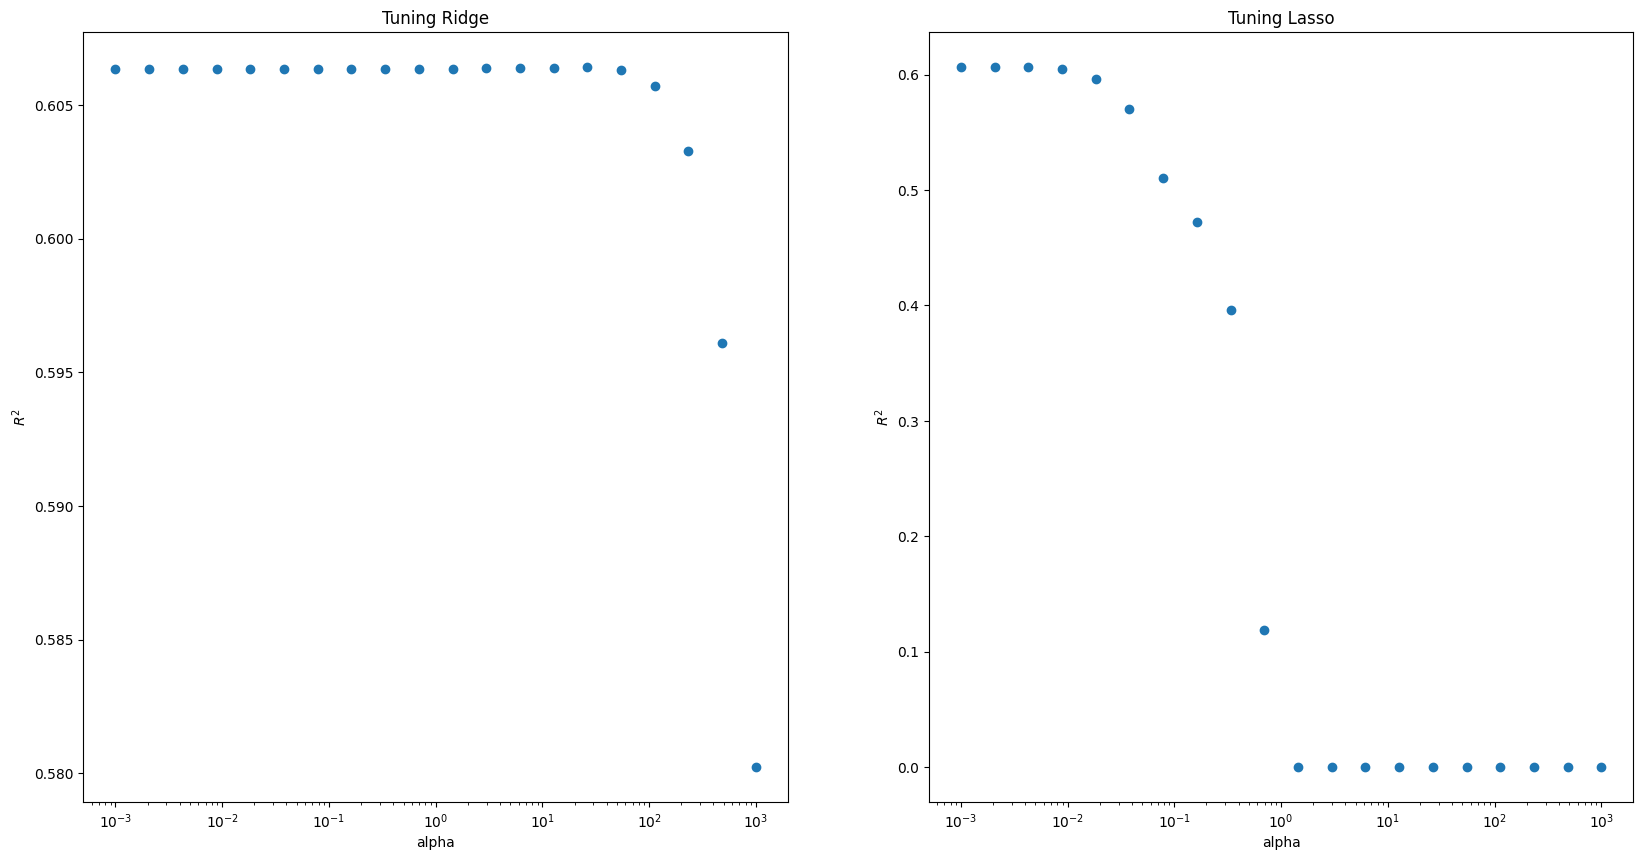

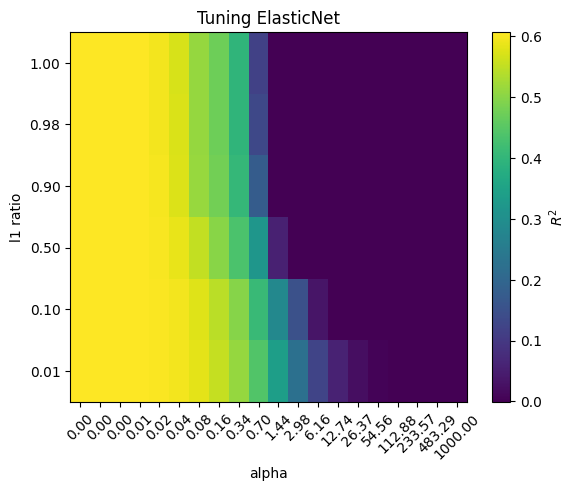

In [12]:
# Visualizations

fig, axes = plt.subplots(1,2, figsize=(20,10))
left, right = axes.ravel()

left.scatter(ridge_params['alpha'], grids[0].cv_results_['mean_test_score'])
left.set_xscale('log')
left.set_xlabel('alpha')
left.set_ylabel(r'$R^2$')
left.set_title('Tuning Ridge')

right.scatter(lasso_params['alpha'], grids[1].cv_results_['mean_test_score'])
right.set_xscale('log')
right.set_xlabel('alpha')
right.set_ylabel(r'$R^2$')
right.set_title('Tuning Lasso')

fig = plt.figure()
ax = plt.gca()
scores = grids[-1].cv_results_['mean_test_score']
sdf = pd.DataFrame(grids[-1].cv_results_)[['param_elasticnet__alpha', 'param_elasticnet__l1_ratio', 'mean_test_score']]
table = sdf.pivot(index='param_elasticnet__l1_ratio', columns='param_elasticnet__alpha', values='mean_test_score')
display(table.head())
im = ax.imshow(table, aspect='auto', interpolation=None)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label(r'$R^2$')
#ax.set_xscale('log') # actually make it harder to read
ax.set_xticks(range(len(enet_params['alpha'])))
ax.set_xticklabels([f"{x:.2f}" for x in enet_params['alpha']], rotation=45)
ax.set_yticks(range(len(enet_params['l1_ratio'])))
ax.set_yticklabels([f"{x:.2f}" for x in enet_params['l1_ratio']])
ax.invert_yaxis()
ax.set(xlabel='alpha', ylabel='l1 ratio', title='Tuning ElasticNet');

**1.8** Visualize (perhaps with a bar chart) the coefficients of the resulting models (the best ones you found using `GridSearchCV`). Do they agree on which features are important?

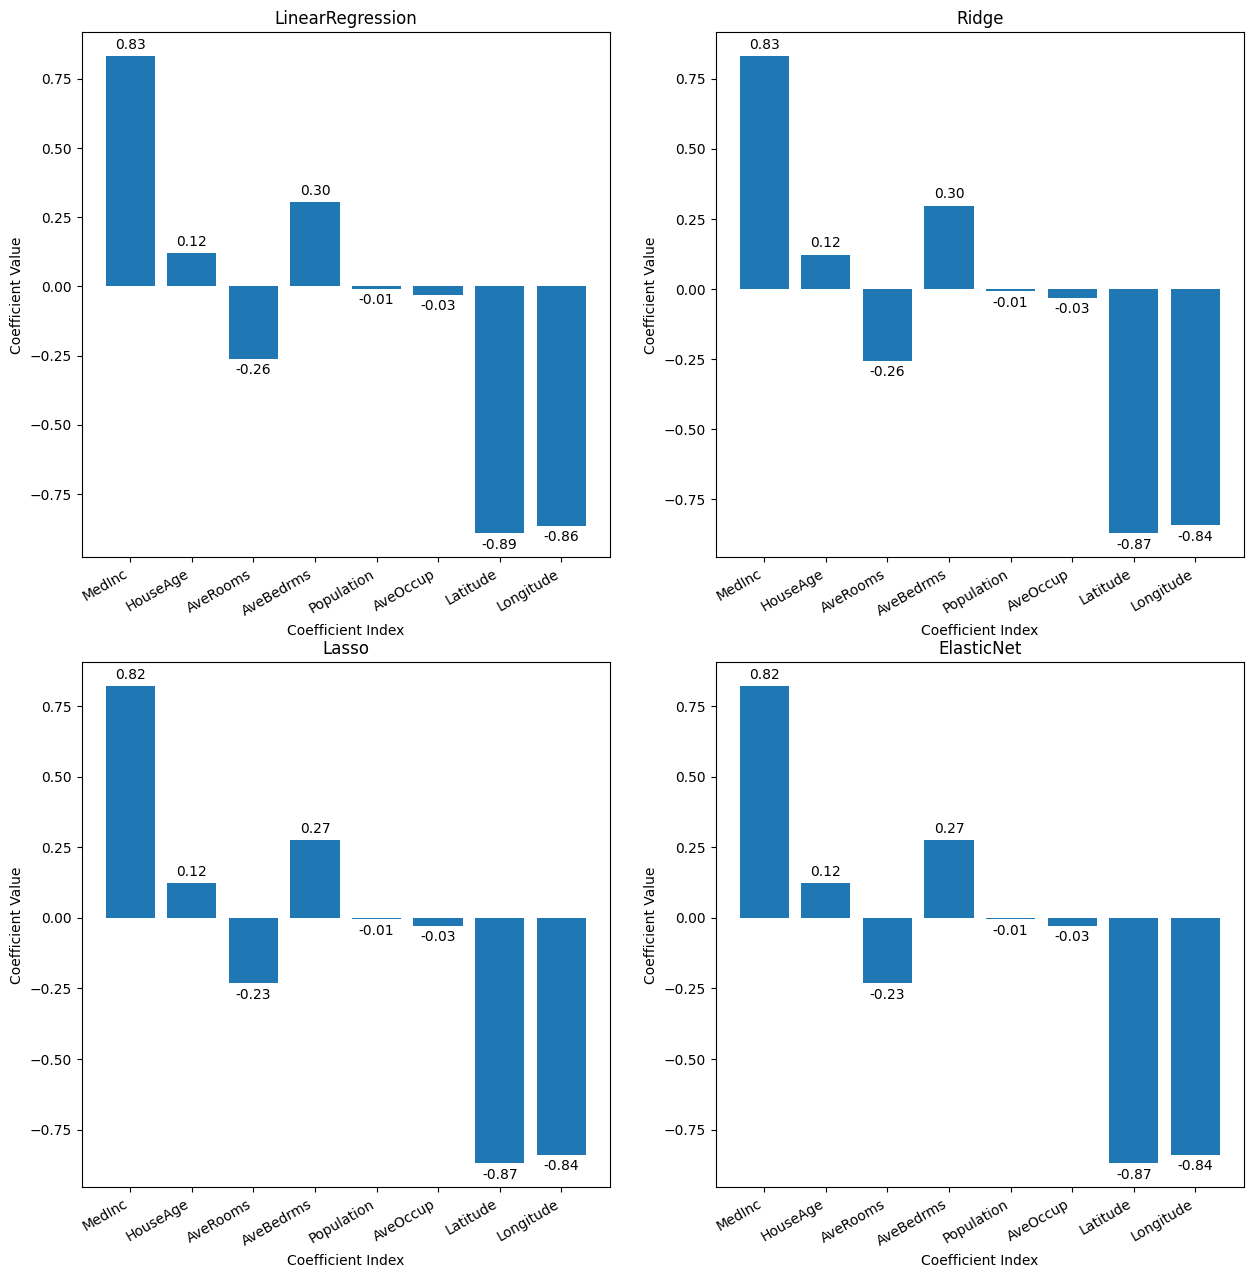

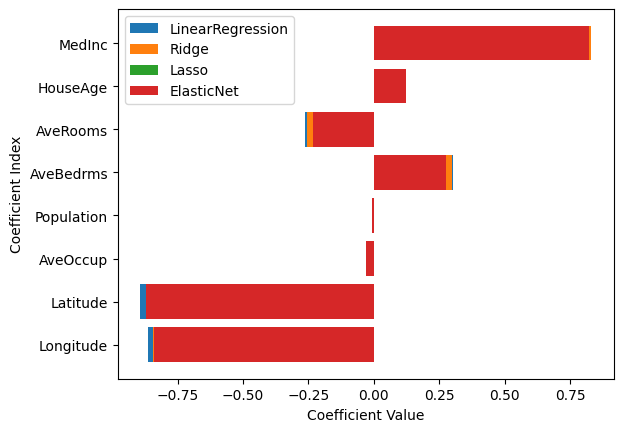

In [13]:
# 1.8 code here

lr = make_pipeline(StandardScaler(), LinearRegression())
lr.fit(X_train, y_train)
final_models = [lr] + [g.best_estimator_ for g in grids]

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for pipe, ax in zip(final_models, axes.ravel()):
    model = pipe[-1]
    idx = range(len(model.coef_))
    container = ax.bar(idx, model.coef_, label=df.columns)
    ax.set_xticks(idx)
    ax.set_xticklabels(df.columns, rotation=30, ha='right')
    ax.bar_label(container, fmt='%.2f', padding=3)
    ax.set_title(model.__class__.__name__)
    ax.set_xlabel("Coefficient Index")
    ax.set_ylabel("Coefficient Value")
    
# all on one:
fig = plt.figure()
ax = plt.gca()
y_pos = np.arange(len(final_models[0][-1].coef_))
ax.set_yticks(y_pos)
ax.set_yticklabels(features)
ax.invert_yaxis() # top to bottom
ax.set_xlabel("Coefficient Value")
ax.set_ylabel("Coefficient Index")

# could also plot intercept_, but it screws up the scale
for pipe in final_models:
    model = pipe[-1]
    ax.barh(y_pos, model.coef_, 
            label=model.__class__.__name__)

plt.legend();

**1.9** Finally, take your best model with best hyperparameters, retrain it on the whole training set (this might already be done, depending on how you called `GridSearchCV`), and evaluate it on the test set. Show your results.

In [14]:
# 1.9 code here
grids[-1].best_estimator_.score(X_test, y_test)

0.590739567198399

## Question 2: Predicting Breast Cancer

Dataset: sklearn.datasets.load_breast_cancer

In [15]:
dataset = load_breast_cancer()
print(dataset.DESCR)
print(dataset.keys())

X = dataset.data
y = dataset.target
print(X.shape, y.shape)

display(pd.value_counts(y))

df = pd.DataFrame(X, columns=dataset.feature_names)
df.head()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

1    357
0    212
dtype: int64

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**2.1** Visualize the univariate distribution of each feature, and the distribution of the target.

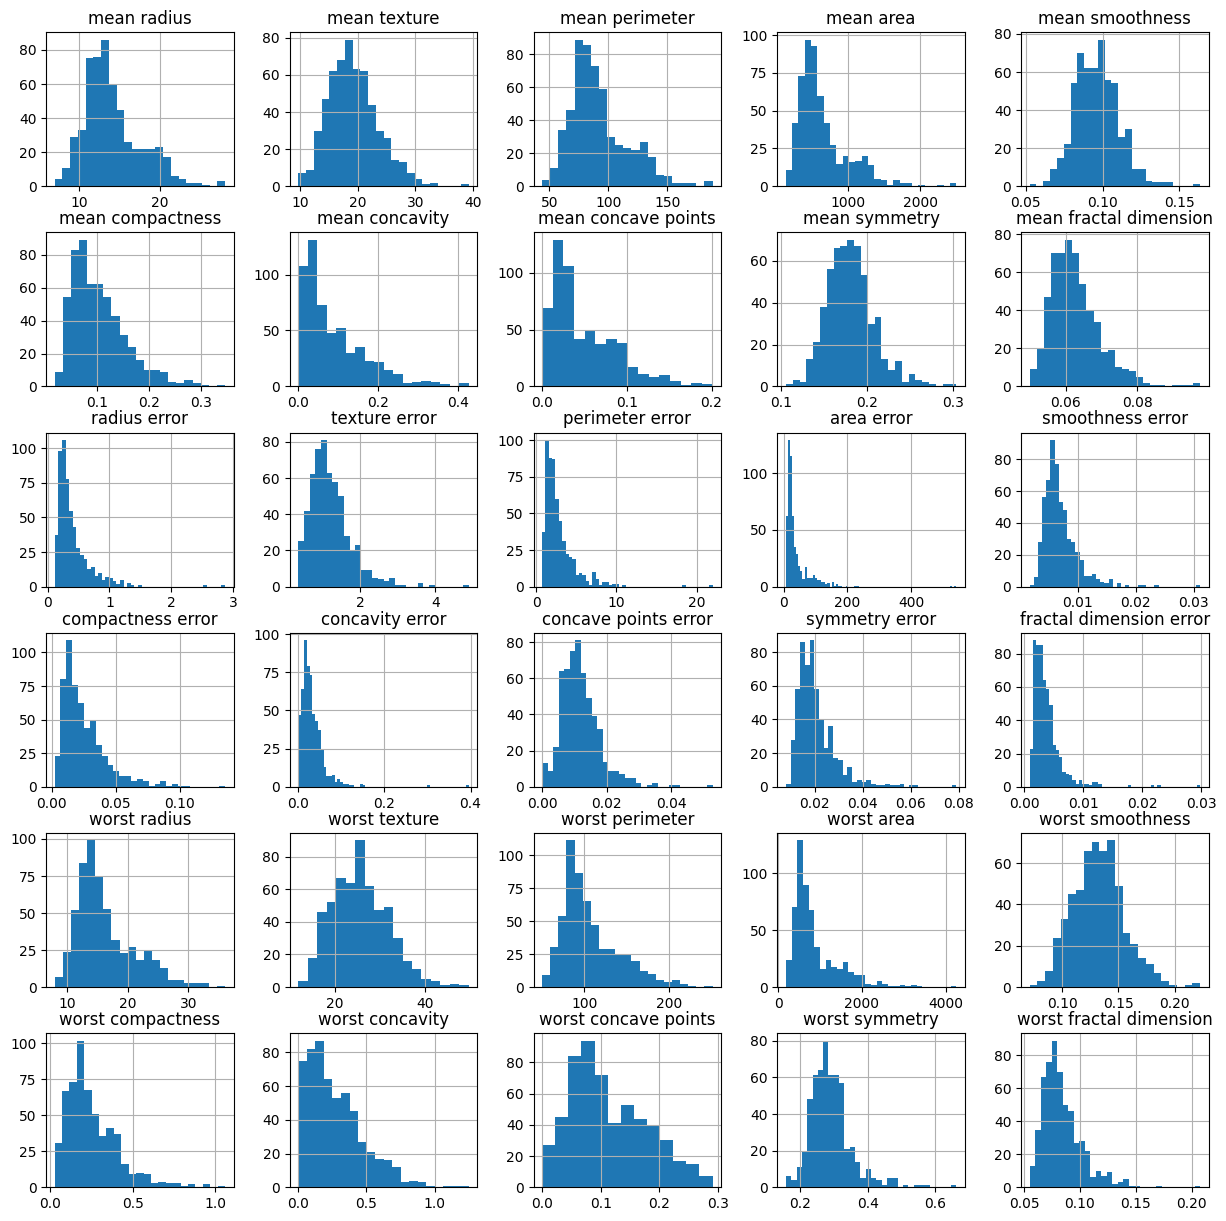

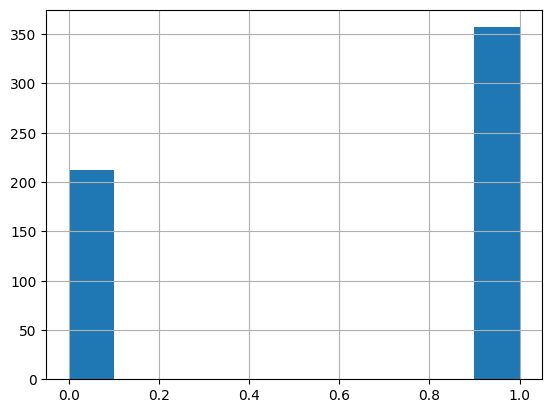

In [16]:
df.hist(figsize=(15,15), bins='auto')

plt.figure()
pd.Series(y, name='target').hist();

**2.2** Split data into training and test set.

In [17]:
# 2.2 code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**2.3** Evaluate Logistic Regression (`LogisticRegression`), linear support vector machines (`LinearSVC`) and nearest centroids (`NearestCentroid`) using cross-validation with the default hyperparameters (use `cross_val_score`). 

Do not preprocess the data in any way.

a. Print out the results (i.e., accuracy for each).

b. Look up the two hyperparameters I specified below (`solver='liblinear'` for `LogisticRegression`) and `dual=False` for `LinearSVC`). These both have to do with how the models' parameters are learned. Why do you think I chose the values I did, over the alternatives?

In [18]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import cross_val_score

models = [LogisticRegression(solver='liblinear'), LinearSVC(dual=False), NearestCentroid()]
for model in models:
    score = np.mean(cross_val_score(model, X_train, y_train, cv=3))
    name = type(model).__name__
    print(f"{name} accuracy: {score:.3f}")

LogisticRegression accuracy: 0.944
LinearSVC accuracy: 0.958
NearestCentroid accuracy: 0.885


**2.4** Same thing, but now scale the data first. Does it help? Comment on any warnings that you did or not see when using scaling compared to not scaling.

In [19]:
# 2.4 code here
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

for model in models:
    pipe = make_pipeline(StandardScaler(), model)
    score = np.mean(cross_val_score(pipe, X_train, y_train, cv=10))
    name = type(model).__name__
    print(f"{name} (StandardScaler): {score:.3f}")

LogisticRegression (StandardScaler): 0.981
LinearSVC (StandardScaler): 0.967
NearestCentroid (StandardScaler): 0.930


**2.5** Now let's tune the hyperparameters of the models using GridSearchCV. Use the following models:

- `LogisticRegression`:
    - look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and find and explore at least one hyperparameter.
- `LinearSVC`:
    - `C` can be adjusted; it must be a positive float.
- `NearestCentroid`:
    - explore the `shrink_threshold` hyperparameter.

As above, visualize the performance as a function of the hyperparameters for all three models. If you only used one hyperparameter, your visualizations can just be simple plots (scatter or line). If you used two hyperparameters, use a heatmap. If you used more...well, don't, at least for now.

For all models, print out the accuracy you found. Did the results improve? Save the best model for use in question 2.6.

In [20]:
# 2.5 code here
from sklearn.model_selection import GridSearchCV

# Simple version
Cs = 1 / np.logspace(-3, 3, 7)
logreg_params = {'C': Cs}
lsvm_params = {'C': Cs}
nc_params = {'shrink_threshold': [0, 0.2, 0.5]}

params = [logreg_params, lsvm_params, nc_params]
grids = []
for model, space in zip(models, params):
    pipe = make_pipeline(StandardScaler(), model)
    param_grid = {f"{model.__class__.__name__.lower()}__{k}": v for k, v in space.items()}
    # Verbose b/c I want to see progress for long-running jobs.
    grid = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1, verbose=1, cv=10,
                        return_train_score=True)
    grid.fit(X_train, y_train)
    name = type(model).__name__
    print(f"{name} Accuracy = {grid.best_score_:.3f}")
    print(f"Best params: {grid.best_params_}")
    grids.append(grid)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
LogisticRegression Accuracy = 0.981
Best params: {'logisticregression__C': 1.0}
Fitting 10 folds for each of 7 candidates, totalling 70 fits
LinearSVC Accuracy = 0.979
Best params: {'linearsvc__C': 0.1}
Fitting 10 folds for each of 3 candidates, totalling 30 fits
NearestCentroid Accuracy = 0.930
Best params: {'nearestcentroid__shrink_threshold': 0}


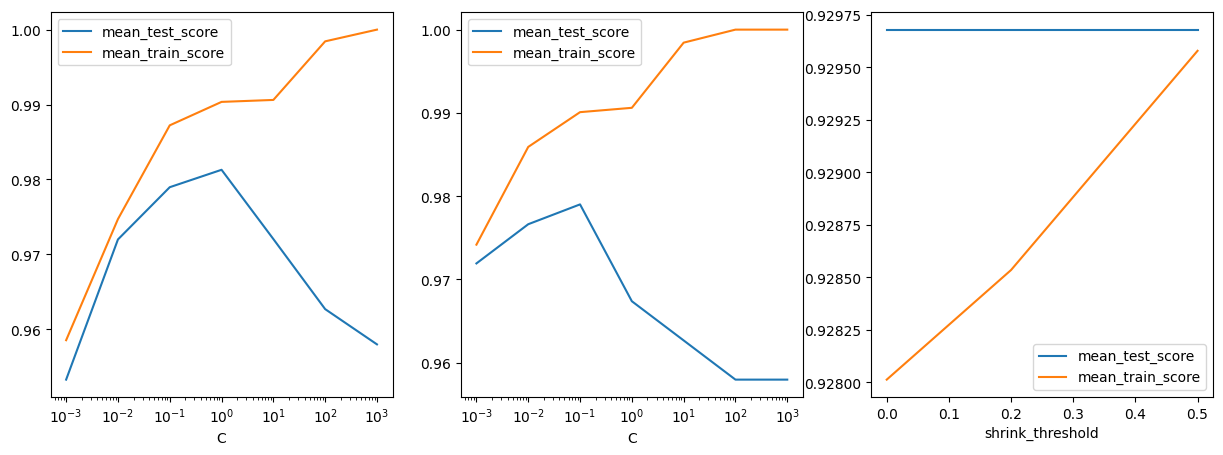

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

scores = pd.DataFrame(grids[0].cv_results_)[['mean_test_score', 'mean_train_score', 'params']]
scores['C'] = scores.apply(lambda row: row['params']['logisticregression__C'], axis=1)
scores.set_index('C', inplace=True)
scores.plot(logx=True, ax=axes[0]);

scores = pd.DataFrame(grids[1].cv_results_)[['mean_test_score', 'mean_train_score', 'params']]
scores['C'] = scores.apply(lambda row: row['params']['linearsvc__C'], axis=1)
scores.set_index('C', inplace=True)
scores.plot(logx=True, ax=axes[1]);

scores = pd.DataFrame(grids[2].cv_results_)[['mean_test_score', 'mean_train_score', 'params']]
scores['shrink_threshold'] = scores.apply(lambda row: row['params']['nearestcentroid__shrink_threshold'], axis=1)
scores.set_index('shrink_threshold', inplace=True)
scores.plot(ax=axes[2]);

In [22]:
# 2.5 code here -- advanced version

logreg_params = [{'penalty': ['none'], 'solver': ['saga'], 'max_iter': [10000]},
                 {'penalty': ['l1'], 'C': Cs},
                 {'penalty': ['l2'], 'C': Cs},
                 {'penalty': ['elasticnet'], 'C': Cs, 'solver': ['saga'],
                  'l1_ratio': [0.01, .1, .5, .9, .98, 1], 'max_iter': [10000]}]
model = LogisticRegression(solver='liblinear')
pipe = make_pipeline(StandardScaler(), model)
param_grid = []
for space in logreg_params:
    prepended = {f"{model.__class__.__name__.lower()}__{k}": v for k, v in space.items()}
    param_grid.append(prepended)
print(param_grid)
grid = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1, verbose=1, cv=10)
grid.fit(X_train, y_train)
print(f"LogReg Accuracy = {grid.best_score_:.3f}")
print(f"Best params: {grid.best_params_}")

best = grid.best_estimator_


[{'logisticregression__penalty': ['none'], 'logisticregression__solver': ['saga'], 'logisticregression__max_iter': [10000]}, {'logisticregression__penalty': ['l1'], 'logisticregression__C': array([1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03])}, {'logisticregression__penalty': ['l2'], 'logisticregression__C': array([1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03])}, {'logisticregression__penalty': ['elasticnet'], 'logisticregression__C': array([1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03]), 'logisticregression__solver': ['saga'], 'logisticregression__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.98, 1], 'logisticregression__max_iter': [10000]}]
Fitting 10 folds for each of 57 candidates, totalling 570 fits
LogReg Accuracy = 0.986
Best params: {'logisticregression__C': 1.0, 'logisticregression__l1_ratio': 0.5, 'logisticregression__max_iter': 10000, 'logisticregression__penalty': 'elasticnet', 'logisticregression__solver': 'saga'}


<Figure size 640x480 with 0 Axes>

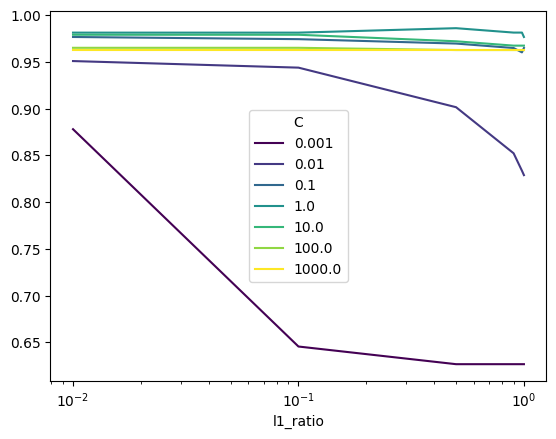

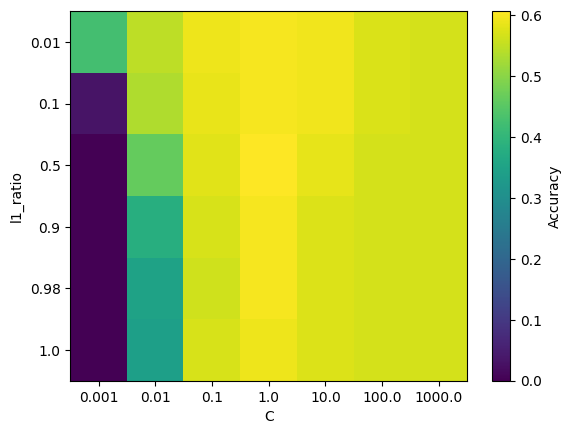

In [23]:
sdf = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]
sdf['penalty'] = sdf.apply(lambda row: row['params']['logisticregression__penalty'], axis=1)
sdf = sdf[sdf['penalty'] == 'elasticnet']
sdf['C'] = sdf.apply(lambda row: row['params']['logisticregression__C'], axis=1)
sdf['l1_ratio'] = sdf.apply(lambda row: row['params']['logisticregression__l1_ratio'], axis=1)
sdf.drop(columns=['params', 'penalty'], inplace=True)
table = sdf.pivot(index='l1_ratio', columns='C', values='mean_test_score')

plt.figure()
table.plot(logx=True, cmap='viridis');

plt.figure()
ax=plt.gca()
plt.imshow(table, cmap='viridis', aspect='auto');
plt.colorbar(im, ax=ax).set_label('Accuracy')
ax.set(xlabel='C', ylabel='l1_ratio', 
       xticks=np.arange(len(table.columns)), yticks=np.arange(len(table.index)),
       xticklabels=table.columns, yticklabels=table.index);

**2.6** By default, `GridSearchCV` will notice you are doing classification and use `StratifiedKFold`. Change this to plain `KFold`. Do the parameters that are found change?

In [24]:
# 2.6 code here
from sklearn.model_selection import KFold

# Simple version
Cs = 1 / np.logspace(-3, 3, 7)
logreg_params = {'C': Cs}
lsvm_params = {'C': Cs}
nc_params = {'shrink_threshold': [0, 0.2, 0.5]}

params = [logreg_params, lsvm_params, nc_params]
cv = KFold(n_splits=10, shuffle=False)
for model, space in zip(models, params):
    pipe = make_pipeline(StandardScaler(), model)
    param_grid = {f"{model.__class__.__name__.lower()}__{k}": v for k, v in space.items()}
    # Verbose b/c I want to see progress for long-running jobs.
    grid = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1, verbose=1, cv=cv,
                        return_train_score=True)
    grid.fit(X_train, y_train)
    name = type(model).__name__
    print(f"{name} Accuracy = {grid.best_score_:.3f}")
    print(f"Best params: {grid.best_params_}")

Fitting 10 folds for each of 7 candidates, totalling 70 fits
LogisticRegression Accuracy = 0.979
Best params: {'logisticregression__C': 1.0}
Fitting 10 folds for each of 7 candidates, totalling 70 fits
LinearSVC Accuracy = 0.979
Best params: {'linearsvc__C': 0.1}
Fitting 10 folds for each of 3 candidates, totalling 30 fits
NearestCentroid Accuracy = 0.930
Best params: {'nearestcentroid__shrink_threshold': 0}


In [25]:
tdf = pd.DataFrame(X_train, columns=dataset.feature_names)
tdf['target'] = y_train
tdf.sort_values(by='target', inplace=True)
yp = tdf['target'].values
Xp = tdf.drop(columns='target').values
cv = KFold(n_splits=3, shuffle=False)
for model, space in zip(models, params):
    pipe = make_pipeline(StandardScaler(), model)
    param_grid = {f"{model.__class__.__name__.lower()}__{k}": v for k, v in space.items()}
    # Verbose b/c I want to see progress for long-running jobs.
    grid = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1, verbose=1, cv=cv,
                        return_train_score=True)
    grid.fit(Xp, yp)
    name = type(model).__name__
    print(f"{name} Accuracy = {grid.best_score_:.3f}")
    print(f"Best params: {grid.best_params_}")

Fitting 3 folds for each of 7 candidates, totalling 21 fits
LogisticRegression Accuracy = 0.974
Best params: {'logisticregression__C': 0.01}
Fitting 3 folds for each of 7 candidates, totalling 21 fits
LinearSVC Accuracy = 0.969
Best params: {'linearsvc__C': 0.001}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
NearestCentroid Accuracy = 0.941
Best params: {'nearestcentroid__shrink_threshold': 0.5}


**2.7** Accuracy is not always a good metric for classification. Run your grid search again (with `StratifiedKFold`) with `'f1'` as the metric. Compare the best model with the model found in 2.4 -- if they are different, compare both accuracy and f1 score.

In [26]:
# 2.7 code here

for model, space in zip(models, params):
    pipe = make_pipeline(StandardScaler(), model)
    param_grid = {f"{model.__class__.__name__.lower()}__{k}": v for k, v in space.items()}
    # Verbose b/c I want to see progress for long-running jobs.
    grid = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1, verbose=1, cv=10,
                        scoring='f1')
    grid.fit(X_train, y_train)
    name = type(model).__name__
    print(f"{name} F1 score = {grid.best_score_:.3f}")
    print(f"Best params: {grid.best_params_}")



Fitting 10 folds for each of 7 candidates, totalling 70 fits
LogisticRegression F1 score = 0.985
Best params: {'logisticregression__C': 1.0}
Fitting 10 folds for each of 7 candidates, totalling 70 fits
LinearSVC F1 score = 0.984
Best params: {'linearsvc__C': 0.1}
Fitting 10 folds for each of 3 candidates, totalling 30 fits
NearestCentroid F1 score = 0.945
Best params: {'nearestcentroid__shrink_threshold': 0}


**2.8** Visualize the coefficients for LogisticRegression and Linear Support Vector Machines.

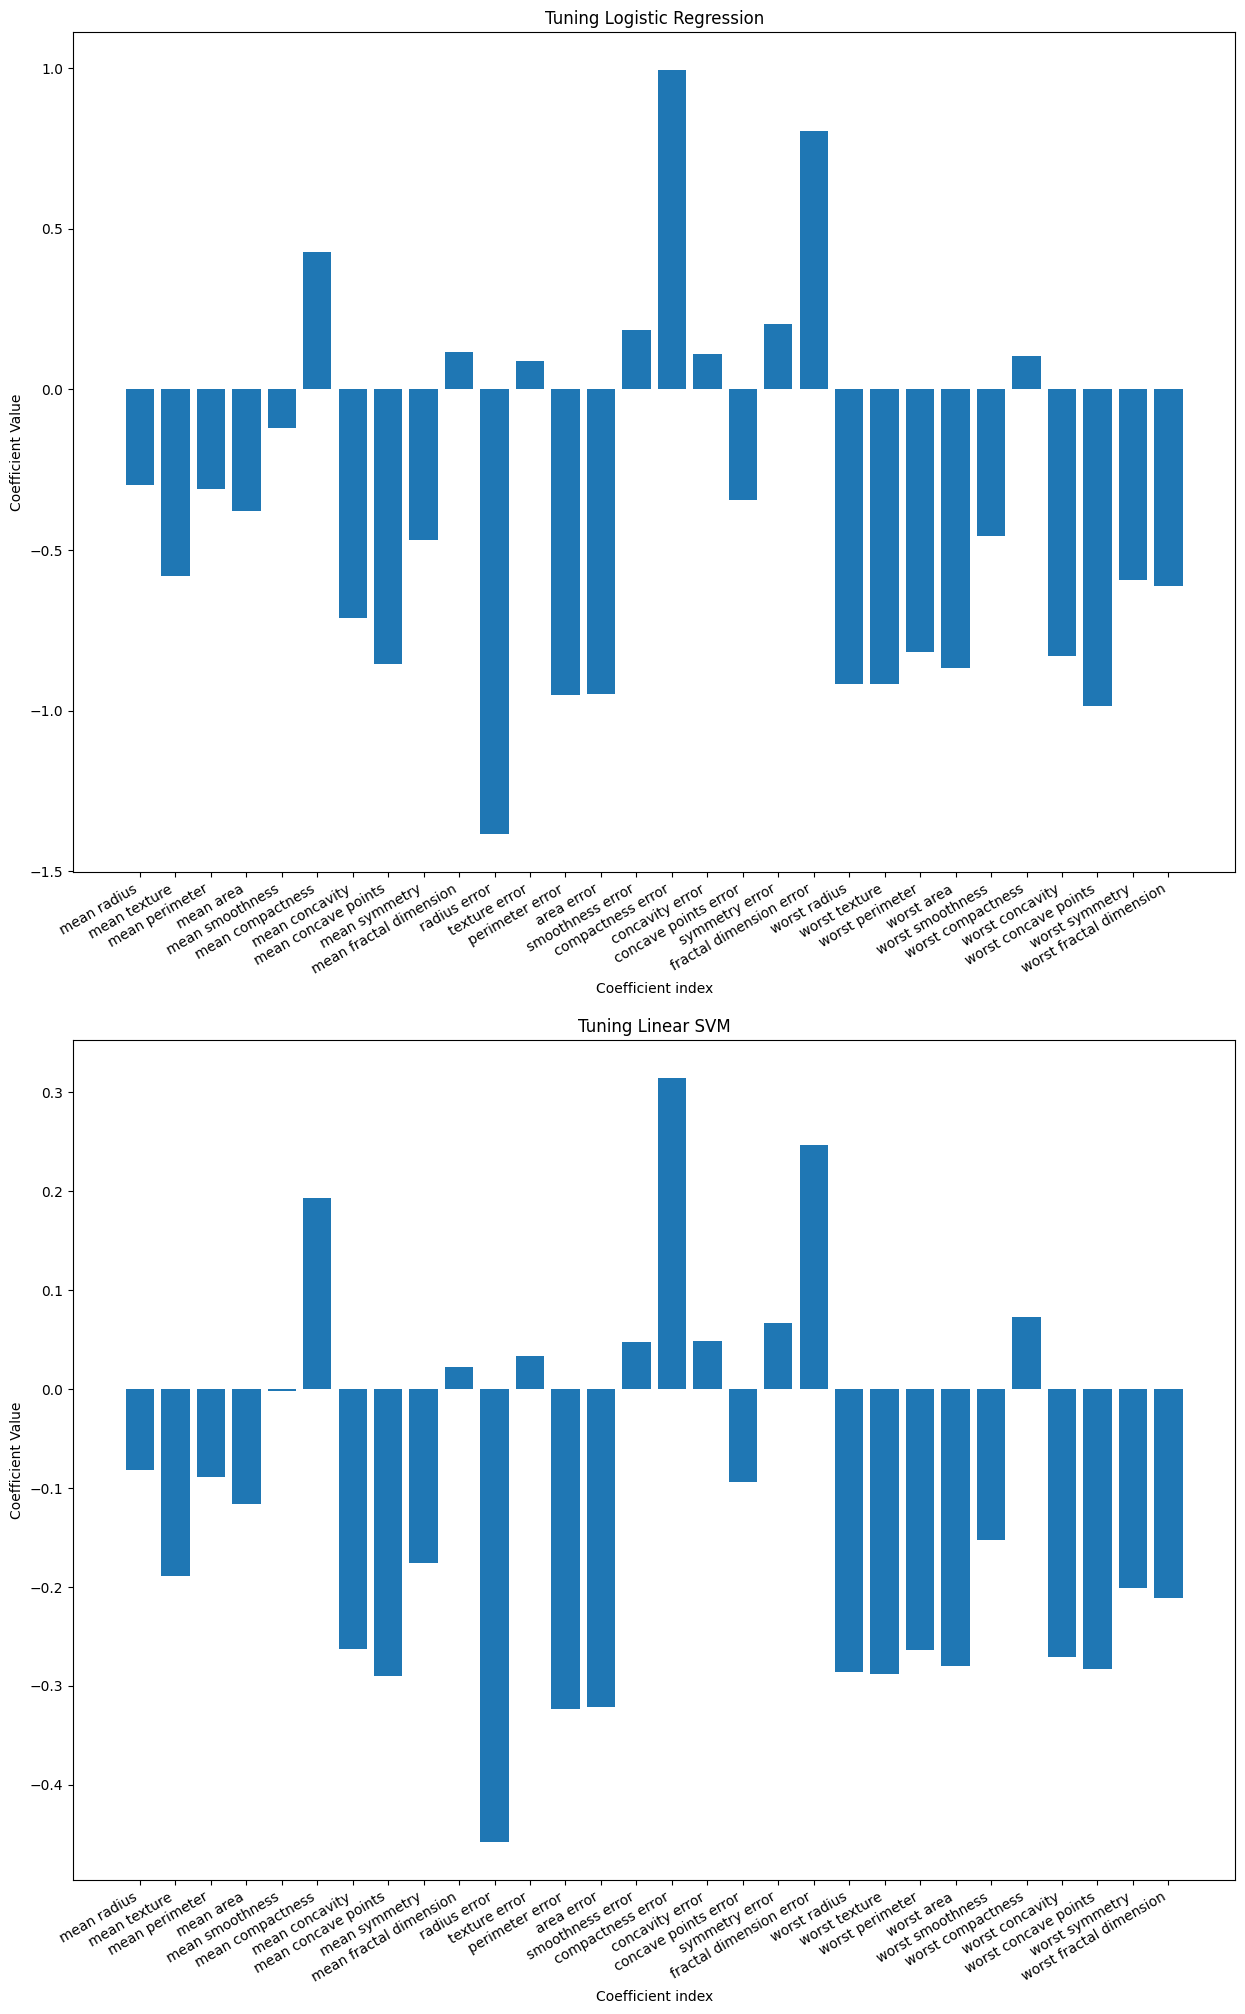

In [27]:
fig, axes = plt.subplots(2,1, figsize=(15,24))
names = ['Logistic Regression', 'Linear SVM', 'Nearest Centroid']
for grid, name, ax in zip(grids[:2], names[:2], axes.ravel()):
    coef = grid.best_estimator_[-1].coef_.reshape(-1)
    ax.bar(range(len(coef)),  coef)
    ax.set_title(f'Tuning {name}')
    ax.set_xlabel('Coefficient index')
    ax.set_ylabel('Coefficient Value')
    ax.set_xticks(range(len(coef)))
    ax.set_xticklabels(dataset.feature_names, rotation=30, ha='right')

**2.9** Finally, take your best model with best hyperparameters, retrain it on the whole training set (this might already be done, depending on how you called `GridSearchCV`), and evaluate it on the test set. Show your results.

In [28]:
best.score(X_test, y_test)

0.958041958041958

## Bonus: Implementing kNN

In class we implemented $k$-nearest neighbors with $k=1$. Let's now implement a $k$NN classifier that can use other $k$ values. In the process you'll also learn about Python's object-oriented features. The only method you'll need to finish is `predict`.

Functions you may find useful:
- `sklearn.metrics.pairwise.euclidean_distances` or `scipy.spatial.distance.euclidean`
- `numpy.argpartition` to find the $k$ shortest distances. Alternatively, you could use Python `bisect` module.
- `numpy.bincount` and `numpy.argmax`

In [134]:
import sklearn.metrics.pairwise as pw
import numpy as np

# Here's the definition of a new class for our classifier.
class kNNClassifier:
    # We only need to remember the number of neighbors; no other initialization
    def __init__(self, k):
        # Setting a member variable is as simple as assigning one. You don't even need to declare it anywhere.
        self.n_neighbors = k
    
    # Remember we don't need to do much here except save the data.
    # We'll assume our data is in the form of a numpy multidimensional array.
    def fit(self, data, target):
        self.data = data
        self.labels = target
    
    # Take in some data points X and return a numpy array of predictions.
    def predict(self, X):
        k = self.n_neighbors
        
        matrix = pw.euclidean_distances(X, self.data)
        closest = np.argpartition(matrix, k, axis=1)[:, :k]
        neighbors = self.labels[closest]
        
        predictions = []
        for i in range(len(X)):
            pred = np.argmax(np.bincount(neighbors[i]))
            predictions.append(pred)
        
        return np.array(predictions)

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=2, 
                           n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for k in [1, 3, 5, 7, 9]:
    real = KNeighborsClassifier(n_neighbors=3)
    mine = kNNClassifier(3)

    real.fit(X_train, y_train)
    mine.fit(X_train, y_train)

    pred_r = real.predict(X_test)
    pred_m = mine.predict(X_test)

    assert np.all(pred_r==pred_m)
    
print("Tests passed!")


Tests passed!
